# Análise de Acidentes rodoviários reportados pela Polícia Rodoviária Federal

Participantes :
* Anderson Prado do Nascimento RA 112160
* Camila Gabriel Oliveira RA 111654
* Lucas Sartorelli Leinatti RA 113515
* Luciano Gonçalves RA 103152

# Introdução

A análise a seguir foi feita utilizando dados de acidentes em rodovias federais no Brasil, de Janeiro de 2007 a Dezembro de 2020, agrupados por ocorrência. Disponibilizados no site www.kaggle.com

O objetivo desse exemplo é realizar uma análise descritiva, ou seja, uma abordagem estatística para resumir e demonstrar as principais características do conjunto de dados, demonstrando medidas padrões e tendenciais, interpretando as informações e chegando a conclusões.

# Carregando Bibliotecas

In [150]:
import sklearn
sklearn.__version__

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from joblib import dump
import warnings

In [152]:
# Personalização das plotagens.
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rc('font', size=20)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
plt.rc('legend', fontsize=15)

# Carregando Dataset

Importando arquivo CSV

In [156]:
# Lendo os dados.
dados = pd.read_csv('datatran2020.csv', delimiter=';')

# Verificando estrutura do Dataset

Preview do dataset

In [160]:
dados.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [162]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63530 entries, 0 to 63529
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      63530 non-null  float64
 1   data_inversa            63530 non-null  object 
 2   dia_semana              63530 non-null  object 
 3   horario                 63530 non-null  object 
 4   uf                      63530 non-null  object 
 5   br                      63372 non-null  float64
 6   km                      63372 non-null  object 
 7   municipio               63530 non-null  object 
 8   causa_acidente          63530 non-null  object 
 9   tipo_acidente           63530 non-null  object 
 10  classificacao_acidente  63530 non-null  object 
 11  fase_dia                63530 non-null  object 
 12  sentido_via             63530 non-null  object 
 13  condicao_metereologica  63530 non-null  object 
 14  tipo_pista              63530 non-null

In [164]:
dados.isna().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        158
km                        158
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                   0
uop                       399
dtype: int64

In [166]:
dados.iloc[0]

id                                       260031.0
data_inversa                           2020-01-01
dia_semana                                 quarta
horario                                  01:00:00
uf                                             TO
br                                          153.0
km                                          678,1
municipio                                  GURUPI
causa_acidente                   Animais na Pista
tipo_acidente             Atropelamento de Animal
classificacao_acidente        Com Vítimas Feridas
fase_dia                              Plena Noite
sentido_via                             Crescente
condicao_metereologica                    Nublado
tipo_pista                                Simples
tracado_via                                  Reta
uso_solo                                      Não
pessoas                                         5
mortos                                          0
feridos_leves                                   0


In [168]:
dados.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,63530.000000,63372.000000,63530.000000,63530.000000,63530.000000,63530.000000,63530.000000,63530.000000,63530.000000,63530.000000
mean,296484.126177,212.433693,2.323973,0.083252,0.855706,0.269054,0.957799,0.158161,1.124760,1.634220
std,20941.580339,131.032981,1.709774,0.339785,1.009129,0.599838,1.342577,0.436545,1.113999,0.724952
min,260031.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,278471.250000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,296549.500000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,314538.750000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,352488.000000,495.000000,73.000000,13.000000,42.000000,19.000000,73.000000,11.000000,44.000000,23.000000


In [170]:
dados['causa_acidente'].unique()

array(['Animais na Pista', 'Falta de Atenção do Pedestre',
       'Ingestão de Álcool', 'Velocidade Incompatível',
       'Falta de Atenção à Condução',
       'Desobediência às normas de trânsito pelo condutor',
       'Condutor Dormindo', 'Pista Escorregadia', 'Mal Súbito',
       'Avarias e/ou desgaste excessivo no pneu',
       'Não guardar distância de segurança',
       'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
       'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
       'Defeito Mecânico no Veículo', 'Ultrapassagem Indevida',
       'Defeito na Via', 'Ingestão de Substâncias Psicoativas',
       'Sinalização da via insuficiente ou inadequada',
       'Objeto estático sobre o leito carroçável', 'Agressão Externa',
       'Fenômenos da Natureza', 'Restrição de Visibilidade',
       'Desobediência às normas de trânsito pelo pedestre',
       'Carga excessiva e/ou mal acondicionada',
       'Ausência de reação do condutor', '

In [172]:
dados['causa_acidente'].value_counts()

causa_acidente
Falta de Atenção à Condução                                                       22410
Desobediência às normas de trânsito pelo condutor                                  8802
Velocidade Incompatível                                                            5883
Ingestão de Álcool                                                                 5069
Defeito Mecânico no Veículo                                                        3742
Não guardar distância de segurança                                                 3606
Condutor Dormindo                                                                  2109
Pista Escorregadia                                                                 2016
Falta de Atenção do Pedestre                                                       1641
Animais na Pista                                                                   1409
Ultrapassagem Indevida                                                             1084
Defeito na Via   

# Pré-processamento

Escolha de características

In [176]:
dados = dados[['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'veiculos']].copy()

Características que possam ser derivadas de outras (fase do dia - deduzido do horário, classificação - deduzida dos feridos/mortos/ilesos, regional - deduzida do estado e etc) não serão selecionadas. Além disso, características que não serão usadas na análise descritiva serão também descartadas

Remoção de duplicatas

In [180]:
dados.duplicated().any()

True

In [182]:
dados.drop_duplicates(inplace=True)
dados.duplicated().any()

False

Remoção de registros com valor nulo

In [185]:
dados.isnull().any().sum()

2

In [187]:
dados.dropna(inplace=True)
dados.isnull().any().any()

False

Renomeação e conversões

In [190]:
# Renomeando os atributos.
dados.rename({'data_inversa': 'Data', 'dia_semana': 'Dia', 'horario': 'Horário', 'uf': 'UF', 'br': 'BR', 'municipio': 'Município', 'causa_acidente': 'Causa', 
              'tipo_acidente': 'Tipo', 'sentido_via': 'Sentido', 'condicao_metereologica': 'Clima', 'tipo_pista': 'Pista', 'tracado_via': 'Traçado', 
              'pessoas': 'Pessoas', 'mortos': 'Mortos', 'feridos_leves': 'Feridos Leves', 'feridos_graves': 'Feridos Graves', 'ilesos': 'Ilesos', 
              'ignorados': 'Ignorados', 'veiculos': 'Veículos'}, axis=1, inplace=True)

In [192]:
# Capitalizando os valores dos atributos Dia e Município.
dados['Dia'] = dados['Dia'].str.title()
dados['Município'] = dados['Município'].str.title()

In [194]:
# Convertendo km para número real e BR para número inteiro.
dados['km'] = dados['km'].astype(str).str.replace(',', '.').astype(float)
dados['BR'] = dados['BR'].astype(int)

Excluindo outliers (registros que se desviam significativamente)

In [197]:
# Função para remover outliers a mais de 5 desvios padrão da média.

def outliers(dados, colunas): 

    indices_incomuns = []
    todos_indices = np.zeros(len(dados), dtype=bool)

    for coluna in colunas:

        dados_coluna = np.array(dados[coluna])
        
        desvio = dados_coluna.std()
        media = dados_coluna.mean()

        indice_incomum = dados_coluna > (media + 5 * desvio)

        indices_incomuns.append(indice_incomum)

    for i in range(len(indices_incomuns)):

        todos_indices = np.logical_or(todos_indices, indices_incomuns[i])

    return todos_indices

In [199]:
# Removendo os outliers das colunas Pessoas e Veículos.
indices_outliers = outliers(dados, ['Pessoas', 'Veículos'])
dados = dados[~indices_outliers]

In [201]:
# O novo conjunto de dados é cerca de 0.7% menor.
dados.head()

,Data,Dia,Horário,UF,BR,km,Município,Causa,Tipo,Sentido,Clima,Pista,Traçado,Pessoas,Mortos,Feridos Leves,Feridos Graves,Ilesos,Ignorados,Veículos
0,2020-01-01,Quarta,01:00:00,TO,153,678.1,Gurupi,Animais na Pista,Atropelamento de Animal,Crescente,Nublado,Simples,Reta,5,0,0,5,0,0,1
1,2020-01-01,Quarta,01:00:00,RJ,116,178.0,Nova Iguacu,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Decrescente,Céu Claro,Dupla,Reta,2,1,0,0,1,0,1
2,2020-01-01,Quarta,01:52:00,SC,101,206.9,Sao Jose,Ingestão de Álcool,Colisão lateral,Crescente,Nublado,Simples,Reta,2,0,1,0,1,0,2
3,2020-01-01,Quarta,01:15:00,RO,364,236.0,Cacoal,Velocidade Incompatível,Saída de leito carroçável,Decrescente,Nublado,Simples,Reta,1,0,0,1,0,0,1
4,2020-01-01,Quarta,01:30:00,PR,153,360.0,Reboucas,Ingestão de Álcool,Capotamento,Crescente,Garoa/Chuvisco,Simples,Curva,6,0,2,4,0,0,1


In [203]:
dados.describe()

,BR,km,Pessoas,Mortos,Feridos Leves,Feridos Graves,Ilesos,Ignorados,Veículos
count,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000
mean,212.364343,261.073515,2.266226,0.081803,0.841910,0.265211,0.920590,0.156711,1.620739
std,131.017338,228.803717,1.280043,0.325570,0.888023,0.571785,1.031268,0.427874,0.674559
min,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,101.000000,78.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,163.000000,192.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
75%,324.000000,410.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
max,495.000000,1243.000000,10.000000,8.000000,10.000000,8.000000,10.000000,6.000000,5.000000


Mapa de correlações

In [206]:
# Função de correlação.

def correlacoes(dados):

    corr = dados.corr().drop(dados.corr().index[0], axis='index').drop(dados.corr().index[-1], axis='columns')

    mascara = np.triu(np.ones(corr.shape)).astype(bool)

    for i in range(len(mascara)):
        for j in range(mascara.shape[1]):
            if i == j:
                mascara[i, j] = False

    sns.set(font_scale=1.6)
    sns.set_style('whitegrid')
    plt.figure(figsize=(15, 13))

    mapa_calor = sns.heatmap(corr, mask=mascara, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidths=1)

    plt.show()

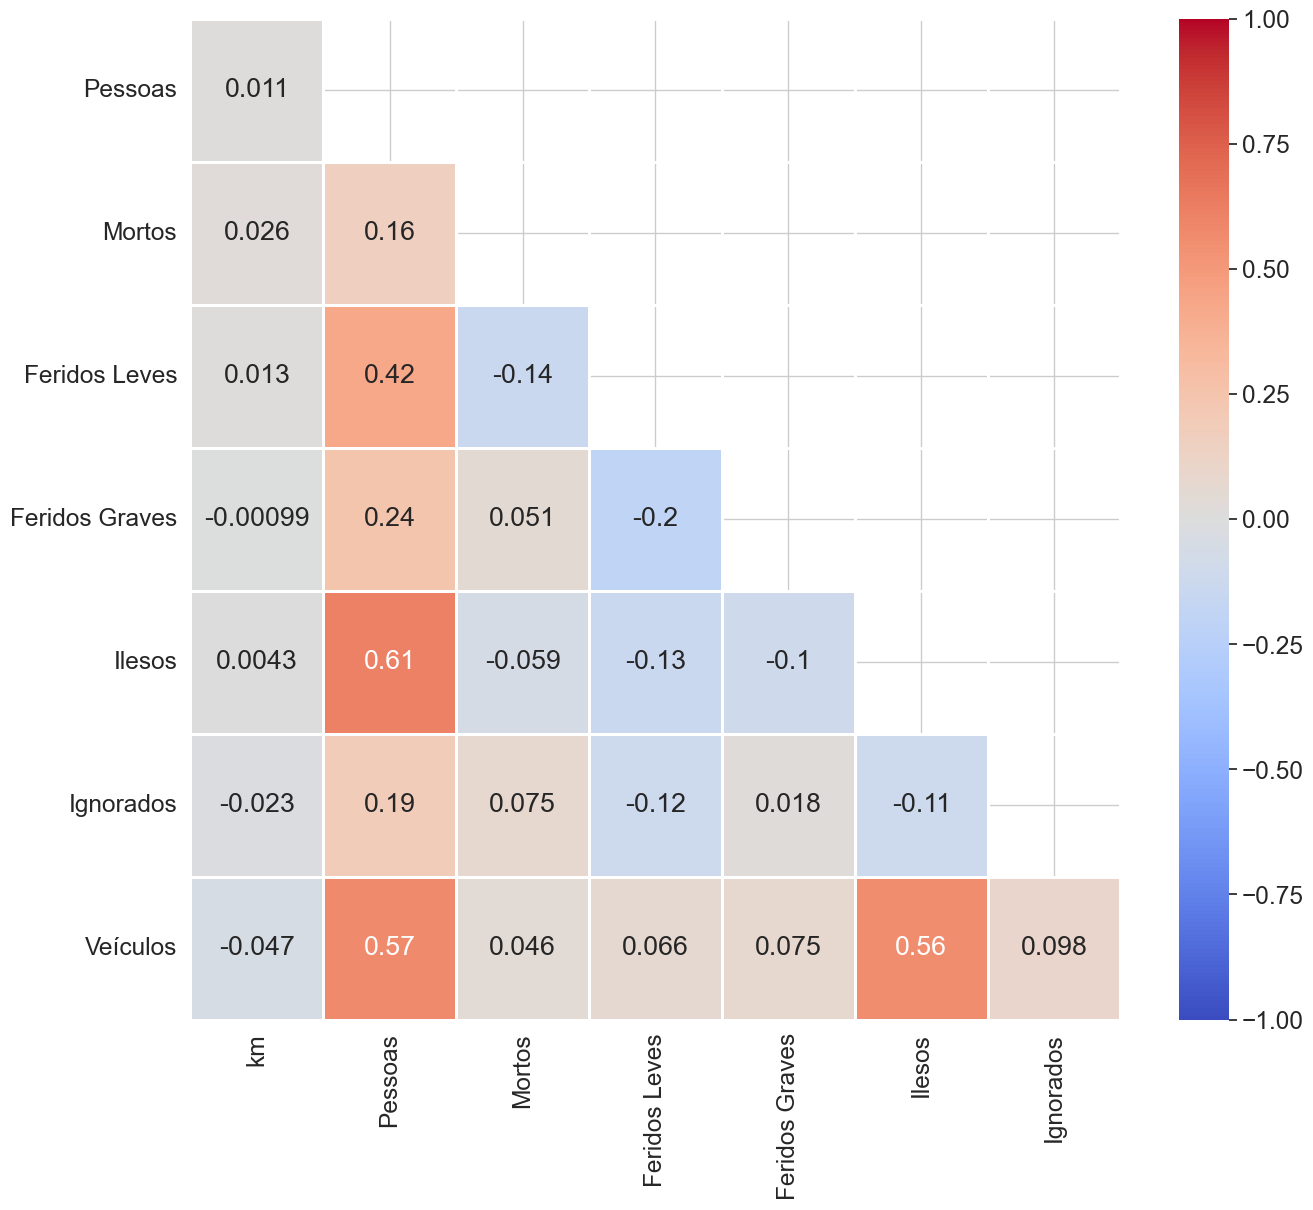

In [208]:
corr = dados[['km', 'Pessoas', 'Mortos', 'Feridos Leves', 'Feridos Graves', 'Ilesos', 'Ignorados', 'Veículos']].copy()
correlacoes(corr)

O mapa de correlações não revela muita coisa além daquilo que já poderíamos prever. Quanto maior o número de pessoas acidentadas maior tende a ser o número de veículos envolvidos, o número de mortos, feridos, ilesos e ignorados. Além disso, quanto maior o número de feridos, menor tende a ser o número de mortos, ilesos e ignorados. Há um número limitado de pessoas envolvidas em um acidente, logo ao crescer o número de feridos então o número de ilesos, ignorados e mortos precisa diminuir, pois são eventos mutuamente exclusivos.

# Análise Univariada

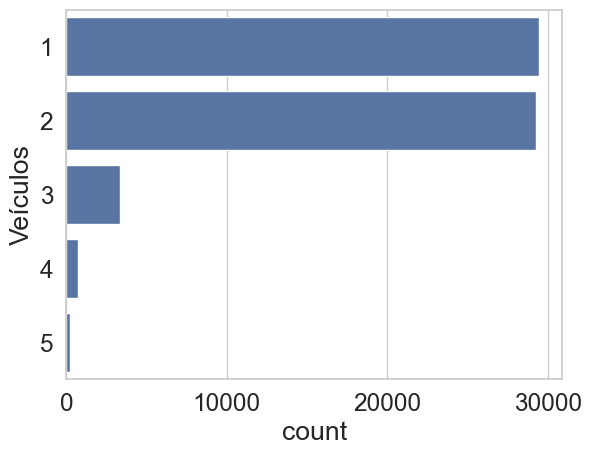

In [212]:
ax = sns.countplot(y=dados['Veículos']);

* Conclusão Veículos: Quase que na totalidade dos registros tem-se 1 ou 2 veículos envolvidos.

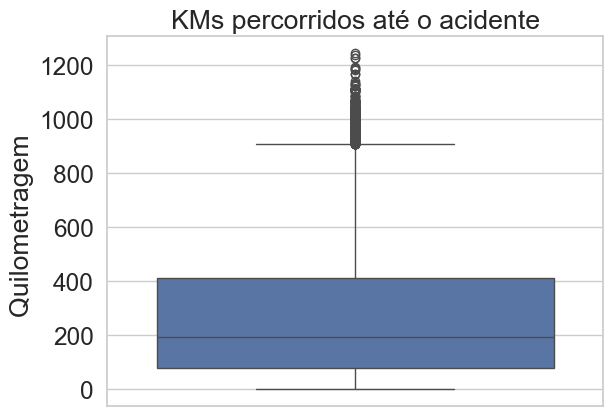

In [215]:
sns.boxplot(y=dados['km'])
plt.title('KMs percorridos até o acidente')
plt.ylabel('Quilometragem ')
plt.show()

* Conclusão km: Metade dos acidentes ocorrem nos primeiros 200 quilômetros percorridos

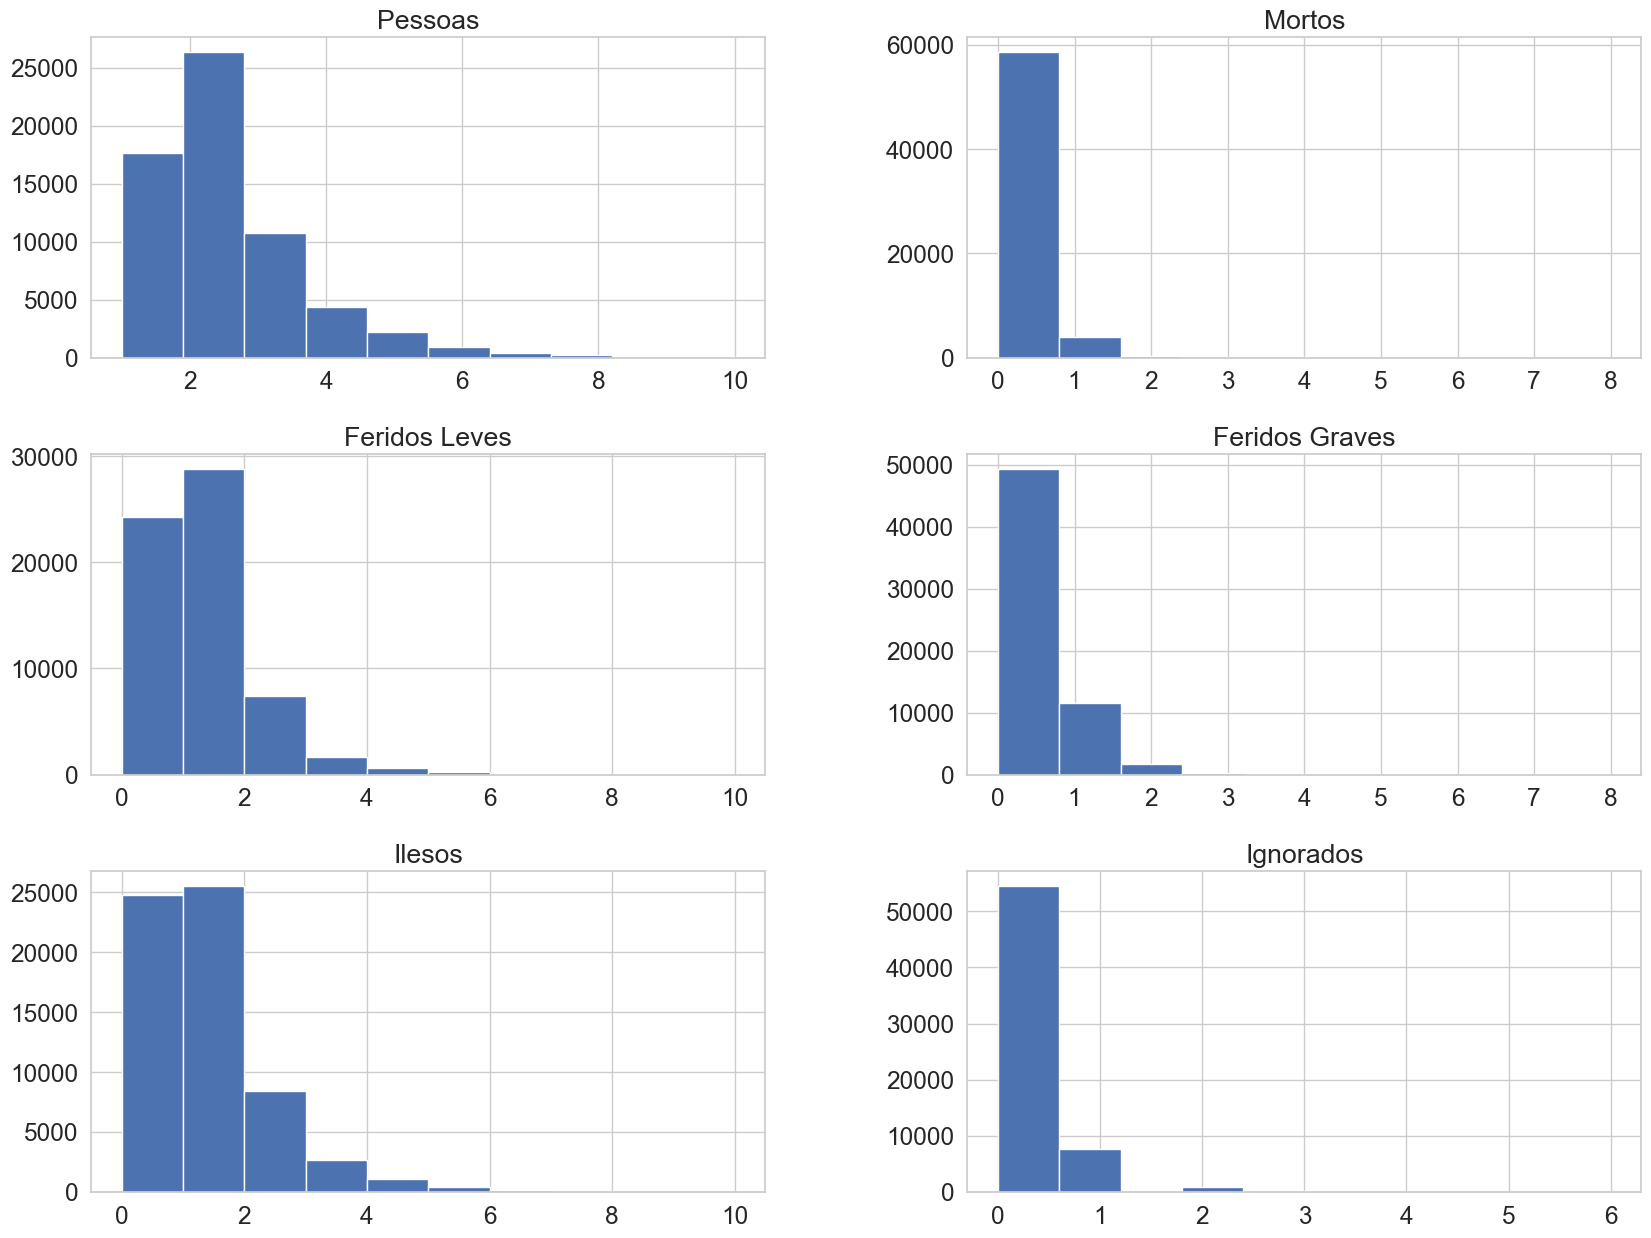

In [218]:
colunas = ['Pessoas', 'Mortos', 'Feridos Leves', 'Feridos Graves', 'Ilesos', 'Ignorados']
dados[colunas].hist(bins=10, figsize=(20, 15))
plt.show()

Dos histogramas pode-se concluir que:
* Pessoas: A maioria dos acidentes tem 1 ou 2 pessoas envolvidas;
* Mortos e Feridos Graves: A imensa maioria dos acidentes não tem mortos ou feridos graves, isso já indica que essas classes estão desbalanceadas;
* Feridos Leves e Ilesos: No entanto, a maioria tem feridos leves ou ilesos.

# Análise Bivariada

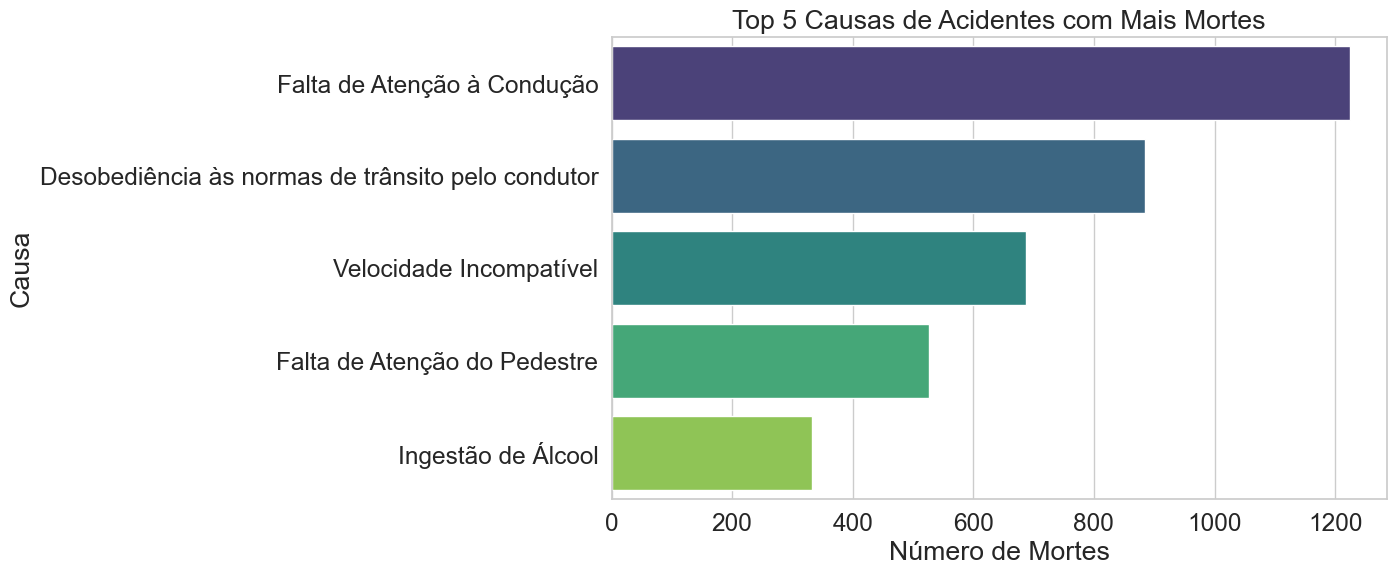

In [222]:
# Agrupando por causa e somando o número de mortes
causas_mortes = dados.groupby('Causa')['Mortos'].sum().nlargest(5).reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=causas_mortes['Mortos'], y=causas_mortes['Causa'], palette='viridis')

# Adicionando título e rótulos
plt.title('Top 5 Causas de Acidentes com Mais Mortes')
plt.xlabel('Número de Mortes')
plt.ylabel('Causa')

# Mostrando o gráfico
plt.show()

* Em todos os casos, a falta de atenção à condução foi a causa de acidentes mais comum, e que gerou o maior número de mortes.

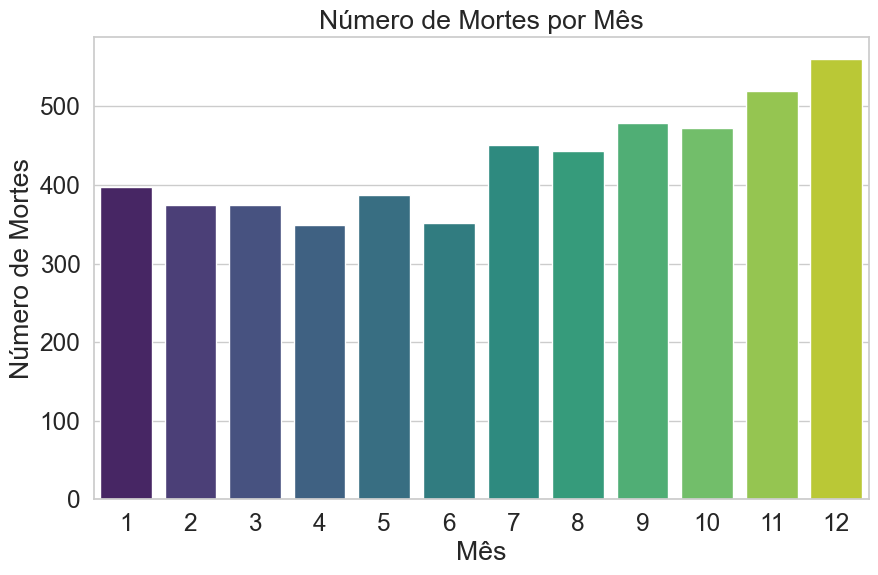

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'dados' seja o seu DataFrame e 'Data' seja a coluna com as datas dos acidentes
# Convertendo a coluna de datas para o formato datetime
dados['Data'] = pd.to_datetime(dados['Data'])

# Extraindo o mês das datas
dados['Mês'] = dados['Data'].dt.month

# Agrupando por mês e somando o número de mortes
mortes_por_mes = dados.groupby('Mês')['Mortos'].sum().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mortes_por_mes['Mês'], y=mortes_por_mes['Mortos'], palette='viridis')

# Adicionando título e rótulos
plt.title('Número de Mortes por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Mortes')

# Mostrando o gráfico
plt.show()


* Podemos observar que curiosamente quando vamos se aproximando do final do ano, os acidentes com mortes aumentam.

# Análise Multivariada

In [231]:
# Criando uma coluna com objetos datetime.
dados['Data e Hora Temp'] = dados['Data'].astype(str) + dados['Horário']
# dados['Data e Hora Temp'] = dados['Data'] + dados['Horário']
dados['Data e Hora'] = dados['Data e Hora Temp'].map(lambda x: datetime.strptime(x, '%Y-%m-%d%H:%M:%S'))

# Excluindo colunas ambíguas.
#dados.drop(['Data', 'Horário', 'Data e Hora Temp'], axis='columns', inplace=True)

# Definindo intervalos com períodos de 6 horas.
dados['Intervalos de Hora'] = pd.cut(dados['Data e Hora'].map(lambda x: x.hour), [0, 6, 12, 18, 24], right=False)

# Agrupando a contagem de pessoas por dia e intervalo de hora.
pessoas_dia_hora = dados.groupby(['Dia', 'Intervalos de Hora'])['Pessoas'].sum().reset_index()

# Ordenando os índices do agrupamento.
novo_indice = []
for dia in ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']:
    novo_indice += list(pessoas_dia_hora[pessoas_dia_hora['Dia'] == dia].index)
    
pessoas_dia_hora = pessoas_dia_hora.reindex(novo_indice, axis='index')

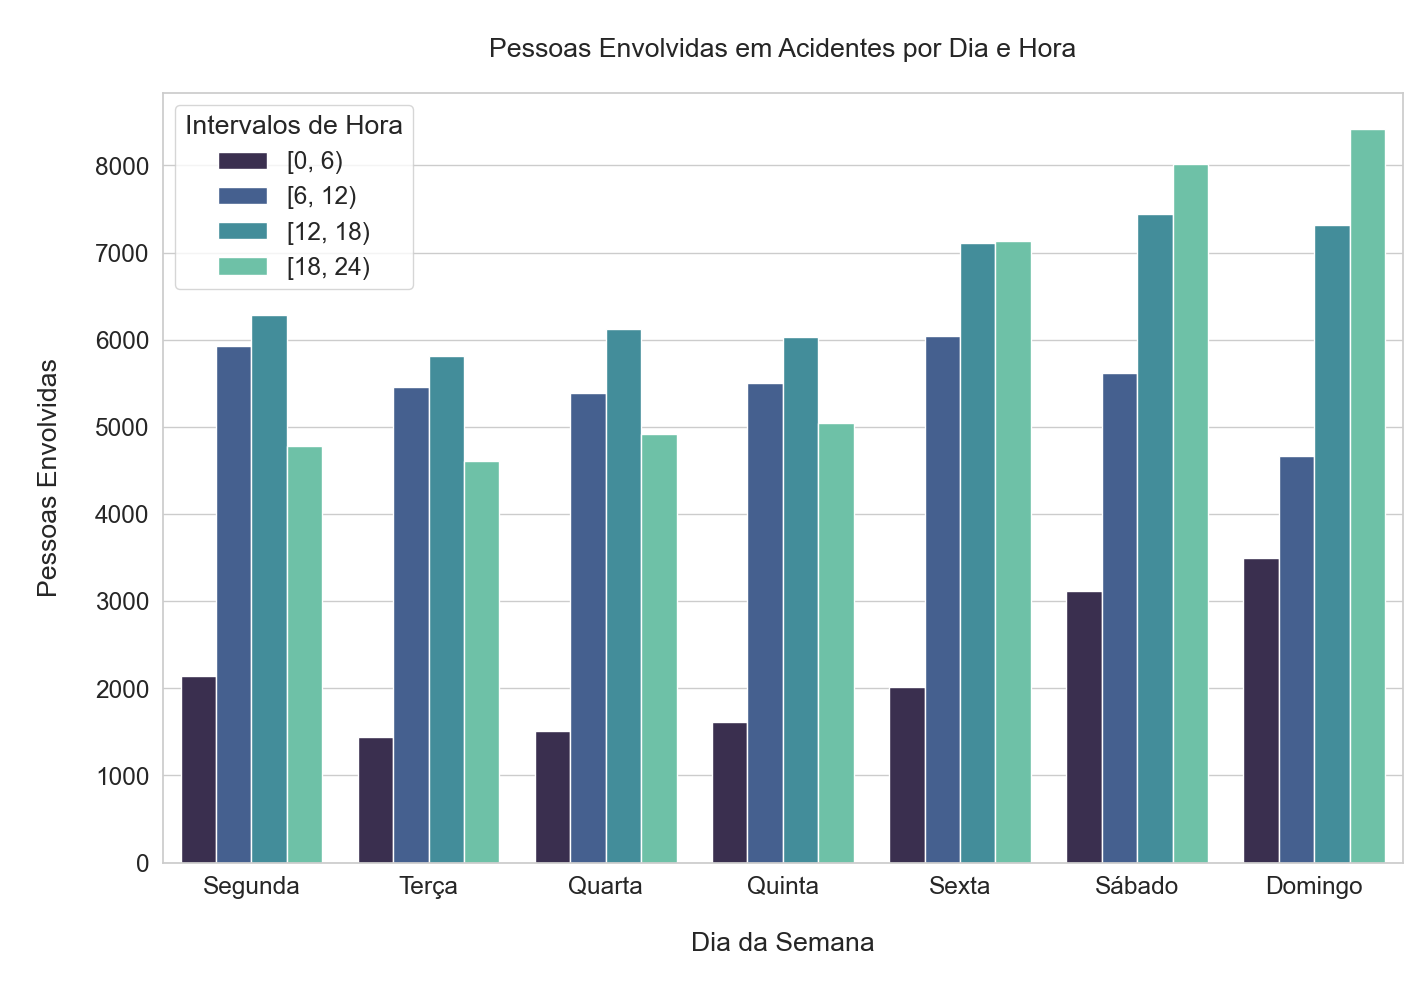

In [233]:
plt.figure(figsize=(16, 10))

barras = sns.barplot(x='Dia', y='Pessoas', hue='Intervalos de Hora', data=pessoas_dia_hora, palette='mako')
barras.set_xlabel("\nDia da Semana\n")
barras.set_ylabel("\nPessoas Envolvidas\n")
barras.set_title("\nPessoas Envolvidas em Acidentes por Dia e Hora\n")

plt.legend(loc='upper left', title='Intervalos de Hora')
plt.show()

In [128]:
# Contagem das pessoas envolvidas em acidentes, agrupadas por dia, em ordem decrescente.
dados.groupby('Dia')['Pessoas'].sum().sort_values(ascending=False)

Dia
Sábado     24190
Domingo    23891
Sexta      22289
Segunda    19136
Quinta     18195
Quarta     17924
Terça      17324
Name: Pessoas, dtype: int64

O período entre 6h e 18h de segunda à quinta é o que mais tem pessoas envolvidas em acidentes, de sexta, sábado e domingo o período com mais pessoas acidentadas é das 12h às 24h. Isso muito possivelmente se deve ao fato de que durante a semana as pessoas vão e voltam do trabalho/estudo em horário comercial que vai da parte da manhã até o entardecer, enquanto que aos finais de semanas as pessoas ficam nas ruas até mais tarde se divertindo, em igrejas e etc. Pode-se perceber também que o período da tarde e noite das sextas é o período da semana com mais acidentes, provavelmente pela pressa das pessoas em chegarem em casa após o trabalho. Isso faz com que os dias com mais pessoas acidentadas sejam a véspera do final de semana (sexta) e os finais de semana propriamente dito.

In [131]:
# Definindo intervalos de 100km.
dados['Intervalos de km'] = pd.cut(dados['km'], range(0, 1301, 100), labels=range(100, 1301, 100)).astype(float)
dados[['km', 'Intervalos de km']].head()

,km,Intervalos de km
0,678.1,700.0
1,178.0,200.0
2,206.9,300.0
3,236.0,300.0
4,360.0,400.0


In [133]:
# Somando os mortos por BR em cada trecho de 100km.
mortos_br_km = dados.groupby(['BR', 'Intervalos de km'])['Mortos'].sum().reset_index().dropna()

# Filtrando os valores maiores que 0.
mortos_br_km = mortos_br_km[mortos_br_km['Mortos'] > 0]

# Ordenando por mortos de forma descrescente.
mortos_br_km.sort_values(by='Mortos', ascending=False, inplace=True)

In [135]:
# Contagem das aparições das 20 BRs mais perigosas.
mortos_br_km['BR'][:20].value_counts()

BR
116    6
101    5
153    4
316    1
20     1
277    1
381    1
262    1
Name: count, dtype: int64

In [137]:
# Criando filtros para a BR 101, 116 e 153.
brs = (mortos_br_km['BR'] == 116) | (mortos_br_km['BR'] == 101) | (mortos_br_km['BR'] == 153)

# Agrupando as BRs 101, 116 e 153 por contagem de mortes em cada trecho.
top_brs = mortos_br_km[brs].groupby(['BR', 'Intervalos de km'])['Mortos'].sum().reset_index()

# Adicionando valores iniciais que auxiliarão na plotagem de uma ogiva de mortes acumuladas.
for BR in [101, 116, 153]:
    df_to_add = pd.DataFrame({'BR': [BR], 'Intervalos de km': [0], 'Mortos': [0]})
    top_brs = pd.concat([top_brs.iloc[:(top_brs['BR'] == BR).argmax()], df_to_add, top_brs.iloc[(top_brs['BR'] == BR).argmax():]]).reset_index(drop=True)

# Ordenando e reindexando.
top_brs.sort_values(by=['BR', 'Intervalos de km'], inplace=True)
top_brs.index = range(len(top_brs))

# Adicionando uma coluna de mortes acumuladas para todas as BRs.
top_brs['Mortes Acumuladas'] = top_brs.groupby(['BR'])['Mortos'].cumsum()

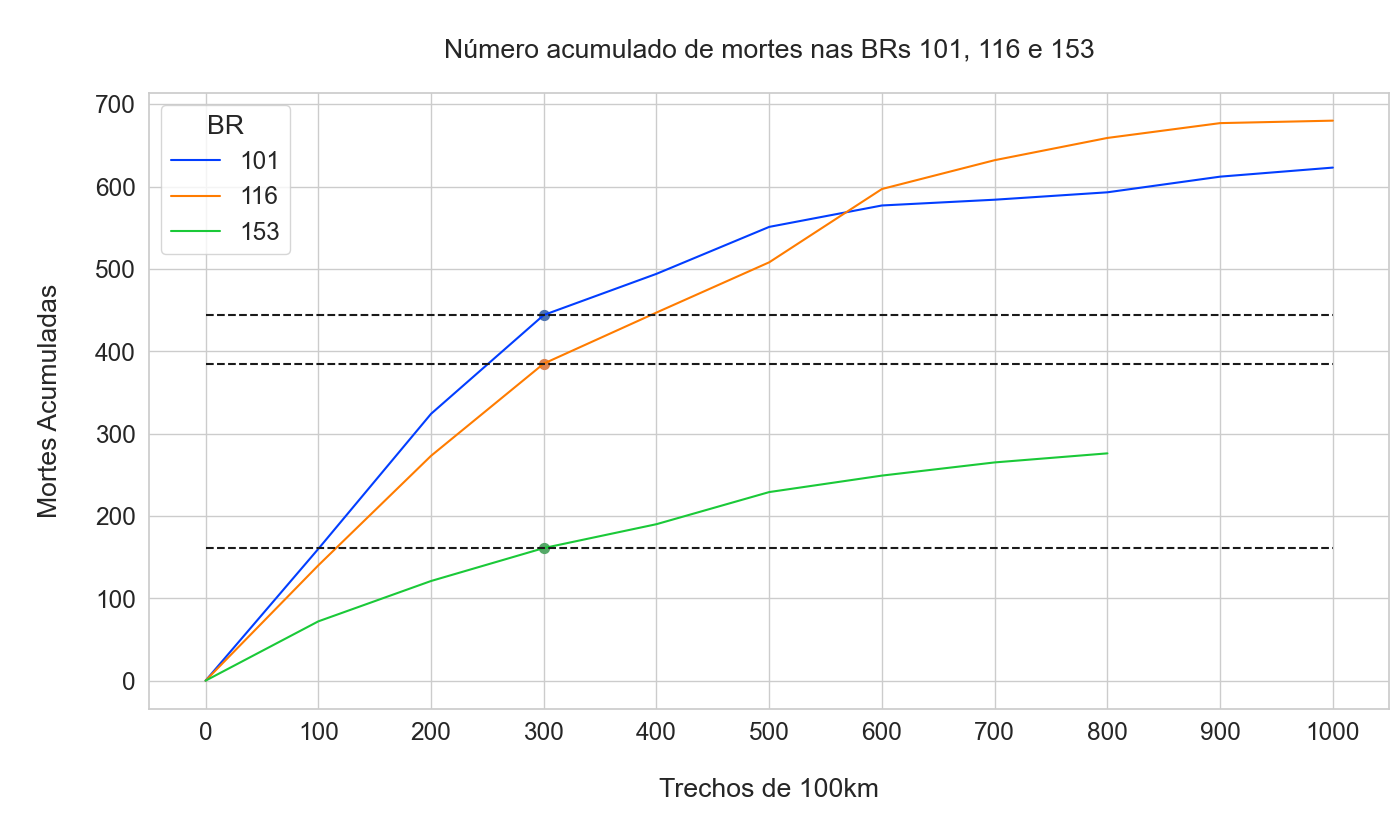

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

linhas = sns.lineplot(ax=ax, x='Intervalos de km', y='Mortes Acumuladas', hue='BR', data=top_brs, palette='bright')
linhas.set_xlabel("\nTrechos de 100km\n")
linhas.set_xticks(top_brs['Intervalos de km'].unique())
linhas.set_ylabel("\nMortes Acumuladas\n")
linhas.set_title("\nNúmero acumulado de mortes nas BRs 101, 116 e 153\n")

for BR in [101, 116, 153]:
    idx = (top_brs['BR'] == BR) & (top_brs['Intervalos de km'] == 300)
    plt.plot([0, 1000], [top_brs[idx]['Mortes Acumuladas'].iloc[0]] * 2, 'k--')
    plt.scatter([300], [top_brs[idx]['Mortes Acumuladas'].iloc[0]], s=50)

plt.legend(loc='best', title='BR')
plt.show()

A BR 116 é a rodovia com mais mortes do país, seguida da BR 101 e BR 153. Pelo gráfico pode-se perceber que a maioria dos acidentes fatais nessas BRs ocorrem majoritariamente nos primeiros 300 kms. Talvez seja melhor colocar mais postos de socorro no decorrer desses 300 kms ou aumentar a fiscalização nesses trechos.

In [142]:
# Contagem de mortes nas 3 BRs mais violentas.
mortos_br_km.groupby('BR')['Mortos'].sum().sort_values(ascending=False).head(3)

BR
116    680
101    623
153    276
Name: Mortos, dtype: int64

* Comando para gerar o arquivo PDF do documento: jupyter nbconvert --to pdf p1.ipynb